Data Preparation and Exploration


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# Load the dataset
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')

In [38]:
print(df.head())

                  Ex_rate
date                     
01-01-1990 00:00   0.7855
02-01-1990 00:00   0.7818
03-01-1990 00:00   0.7867
04-01-1990 00:00   0.7860
05-01-1990 00:00   0.7849


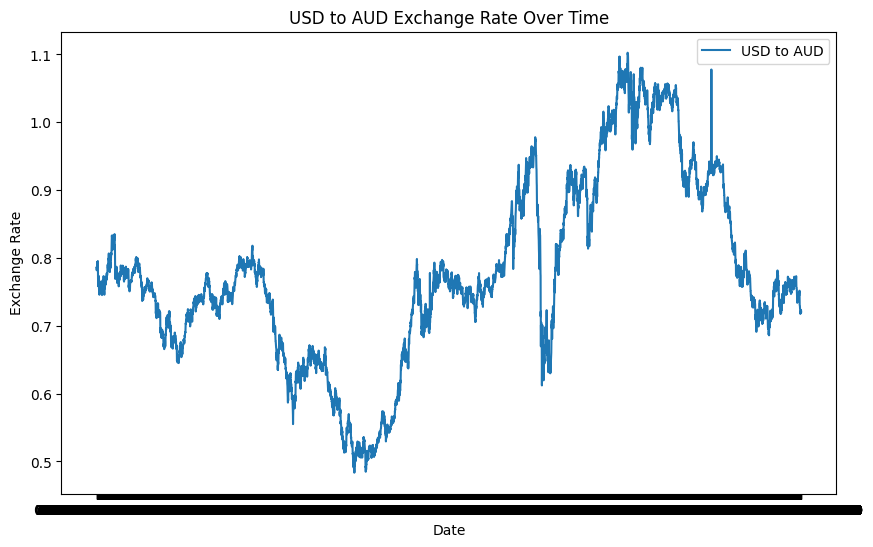

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='USD to AUD')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [35]:
print(df.isna().sum())

Ex_rate    0
dtype: int64


Model Building - ARIMA

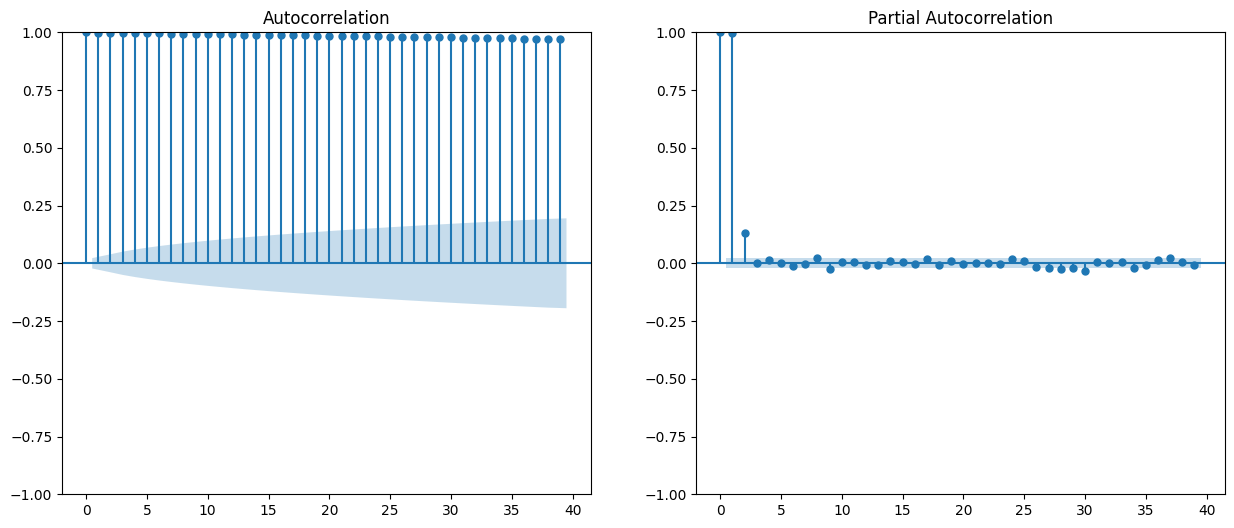

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_acf(df['Ex_rate'], ax=axes[0])
plot_pacf(df['Ex_rate'], ax=axes[1])
plt.show()

In [43]:
from statsmodels.tsa.arima.model import ARIMA

# Initial ARIMA parameters (p, d, q) based on ACF and PACF plots
p, d, q = 1, 1, 1

In [44]:
arima_model = ARIMA(df['Ex_rate'], order=(p, d, q))
arima_result = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [45]:
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 28 Dec 2024   AIC                         -56102.322
Time:                        10:21:05   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

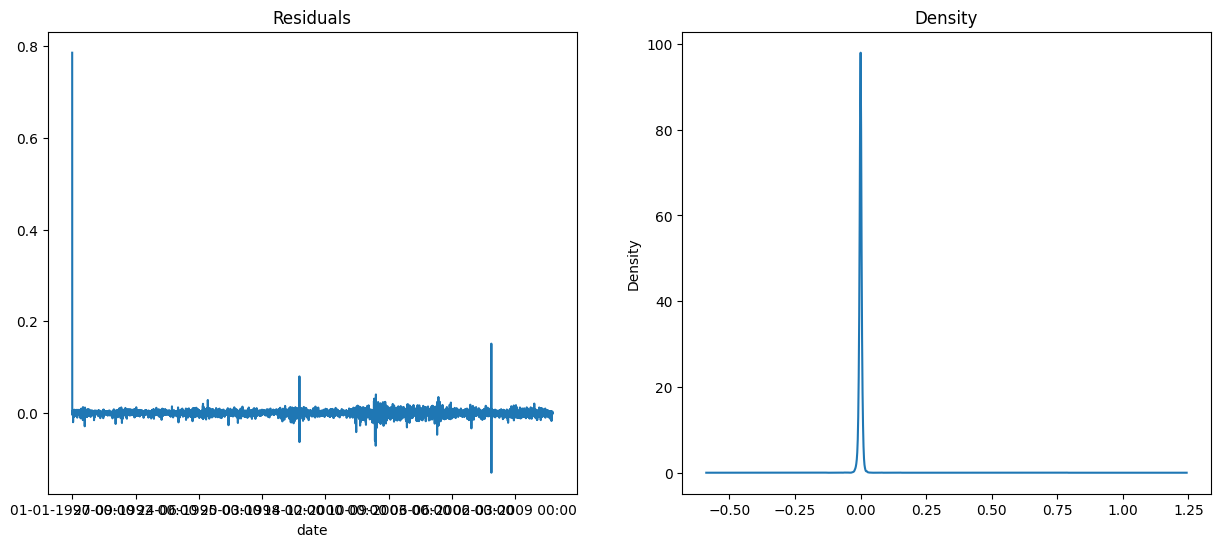

In [46]:
residuals = arima_result.resid
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

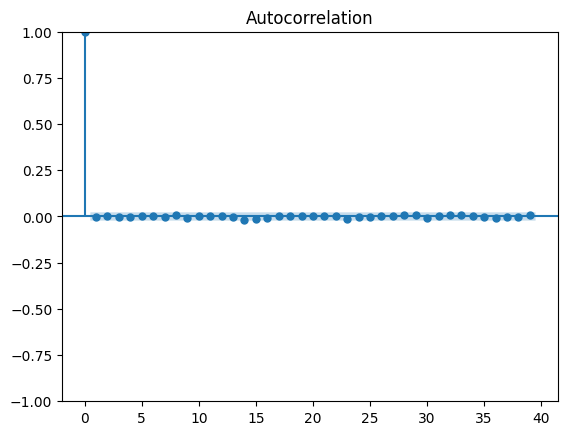

In [47]:
plot_acf(residuals)
plt.show()

In [48]:
# Forecast future values
forecast_steps = 12
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps, freq='M')
forecast_values = forecast.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-48-8da6cbb0db86>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(df.index[-1], periods=forecast_steps, freq='M')


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x7b9543f2f370>.

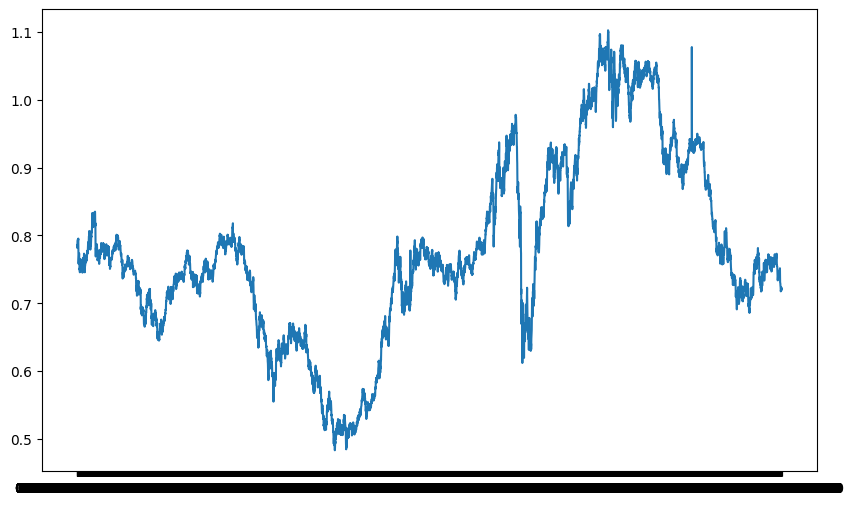

In [50]:
# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('USD to AUD Exchange Rate Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

Model Building - Exponential Smoothing

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt's Linear Trend model
holt_model = ExponentialSmoothing(df['Ex_rate'], trend='add')
holt_result = holt_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [25]:
# Print model summary
print(holt_result.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Sat, 28 Dec 2024
Box-Cox:                          False   Time:                         10:08:21
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700406                alpha                 True
smoothing_trend             0.0000

In [26]:
# Fit the model with optimized parameters (automatically optimized by statsmodels)
holt_model_optimized = ExponentialSmoothing(df['Ex_rate'], trend='add')
holt_result_optimized = holt_model_optimized.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [27]:
# Print optimized model summary
print(holt_result_optimized.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Sat, 28 Dec 2024
Box-Cox:                          False   Time:                         10:08:30
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700406                alpha                 True
smoothing_trend             0.0000

In [28]:
holt_forecast = holt_result_optimized.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x7b952d0c0040>.

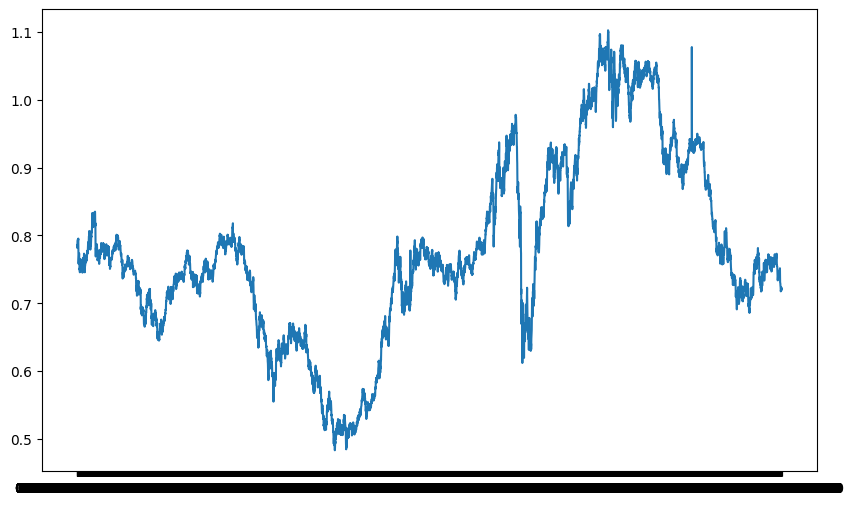

In [52]:
# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical')
plt.plot(forecast_index, holt_forecast, label='Holt Forecast', color='green')
plt.title('USD to AUD Exchange Rate Forecast with Holt\'s Linear Trend')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()




Evaluation and Comparison

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [54]:
arima_forecast_values = forecast_values[:forecast_steps]
arima_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values)
arima_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values))
arima_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - arima_forecast_values) / df['Ex_rate'][-forecast_steps:])) * 100

In [55]:
holt_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], holt_forecast)
holt_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], holt_forecast))
holt_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - holt_forecast) / df['Ex_rate'][-forecast_steps:])) * 100

In [56]:
# Print the error metrics
print(f'ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}')
print(f'Holt MAE: {holt_mae}, RMSE: {holt_rmse}, MAPE: {holt_mape}')

ARIMA MAE: 0.001664492434046964, RMSE: 0.002000358073456273, MAPE: nan
Holt MAE: 0.0016726201414130892, RMSE: 0.001997196833238148, MAPE: nan
